In [46]:
import glob
from collections import OrderedDict

import mne
import pandas as pd
import seaborn as sns
import numpy as np
from mne.decoding import Vectorizer
from mne.io.edf.edf import RawEDF
from pyriemann.classification import MDM
from pyriemann.estimation import ERPCovariances, Xdawn
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from mne.preprocessing import ICA
from matplotlib import pyplot as plt

In [47]:
import sys
sys.path.append('/Users/valery/Documents/github/p300')

In [48]:
files = glob.glob('../data/visual_p300_colomn/train_*.fif')
print(files)

['../data/visual_p300_colomn/train_2023-10-13 16:33:04.819831_raw.fif', '../data/visual_p300_colomn/train_2023-10-13 16:30:37.410082_raw.fif', '../data/visual_p300_colomn/train_2023-10-13 16:25:26.000046_raw.fif', '../data/visual_p300_colomn/train_2023-10-13 16:27:58.404136_raw.fif']


In [49]:
from p300.config import EPOCHS_TMIN, EPOCHS_TMAX
from p300.speller.stimulus import StimulusHelper

ica = ICA(n_components=14, max_iter="auto", random_state=97)

epoch_list = []
for file in files:
    raw = mne.io.read_raw_fif(file, preload=True)  # type: RawEDF

    ica.fit(raw)
    ica.apply(raw)

    raw.filter(1, 30)
    events = mne.find_events(raw)

    event_id = StimulusHelper.get_train_event_id()
    epoch = mne.Epochs(raw, events, event_id, tmin=EPOCHS_TMIN, tmax=EPOCHS_TMAX, baseline=None, preload=True)
    epoch_list.append(epoch)

epochs = mne.concatenate_epochs(epoch_list)  # type: mne.Epochs
easycap_montage = mne.channels.make_standard_montage('easycap-M1')
epochs.set_montage(easycap_montage)
epochs.pick_types(eeg=True)

Opening raw data file ../data/visual_p300_colomn/train_2023-10-13 16:33:04.819831_raw.fif...
Isotrak not found
    Range : 0 ... 16215 =      0.000 ...    63.340 secs
Ready.
Reading 0 ... 16215  =      0.000 ...    63.340 secs...
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


/var/folders/93/5jz5pp8n51dfgh8j4_9hr73r0000gn/T/ipykernel_75022/1411025153.py:10: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)

200 events found
Event IDs: [1 2]
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 155 original time points ...
1 bad epochs dropped
Opening raw data file ../

/var/folders/93/5jz5pp8n51dfgh8j4_9hr73r0000gn/T/ipykernel_75022/1411025153.py:10: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)

200 events found
Event IDs: [1 2]
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 155 original time points ...
1 bad epochs dropped
Opening raw data file ../

/var/folders/93/5jz5pp8n51dfgh8j4_9hr73r0000gn/T/ipykernel_75022/1411025153.py:10: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)

200 events found
Event IDs: [1 2]
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 155 original time points ...
1 bad epochs dropped
Opening raw data file ../

/var/folders/93/5jz5pp8n51dfgh8j4_9hr73r0000gn/T/ipykernel_75022/1411025153.py:10: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)

200 events found
Event IDs: [1 2]
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 155 original time points ...
1 bad epochs dropped
Not setting metadata
796 

Number of events,796
Events,NonTarget: 679Target: 117
Time range,-0.102 – 0.500 s
Baseline,off


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows


/Users/valery/.local/share/virtualenvs/.ssh-3VzoVsjv/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


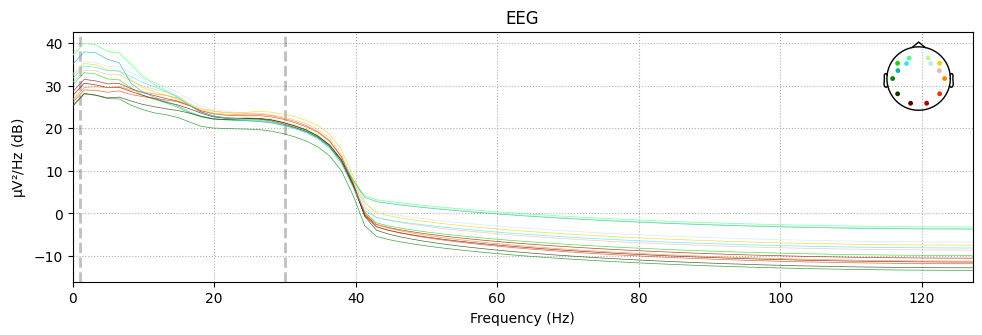

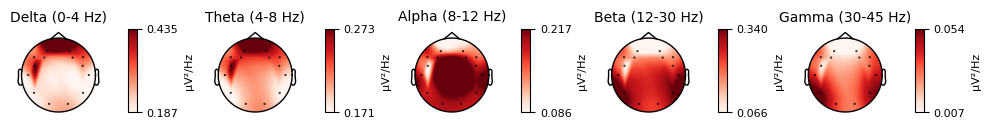

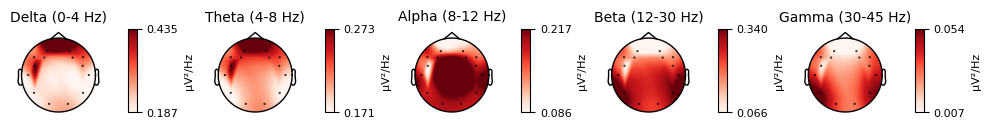

In [50]:
epochs.compute_psd().plot(average=False, picks="data", exclude="bads")
epochs.compute_psd().plot_topomap( normalize=True, contours=0)

/var/folders/93/5jz5pp8n51dfgh8j4_9hr73r0000gn/T/ipykernel_75022/1666700187.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs.plot()


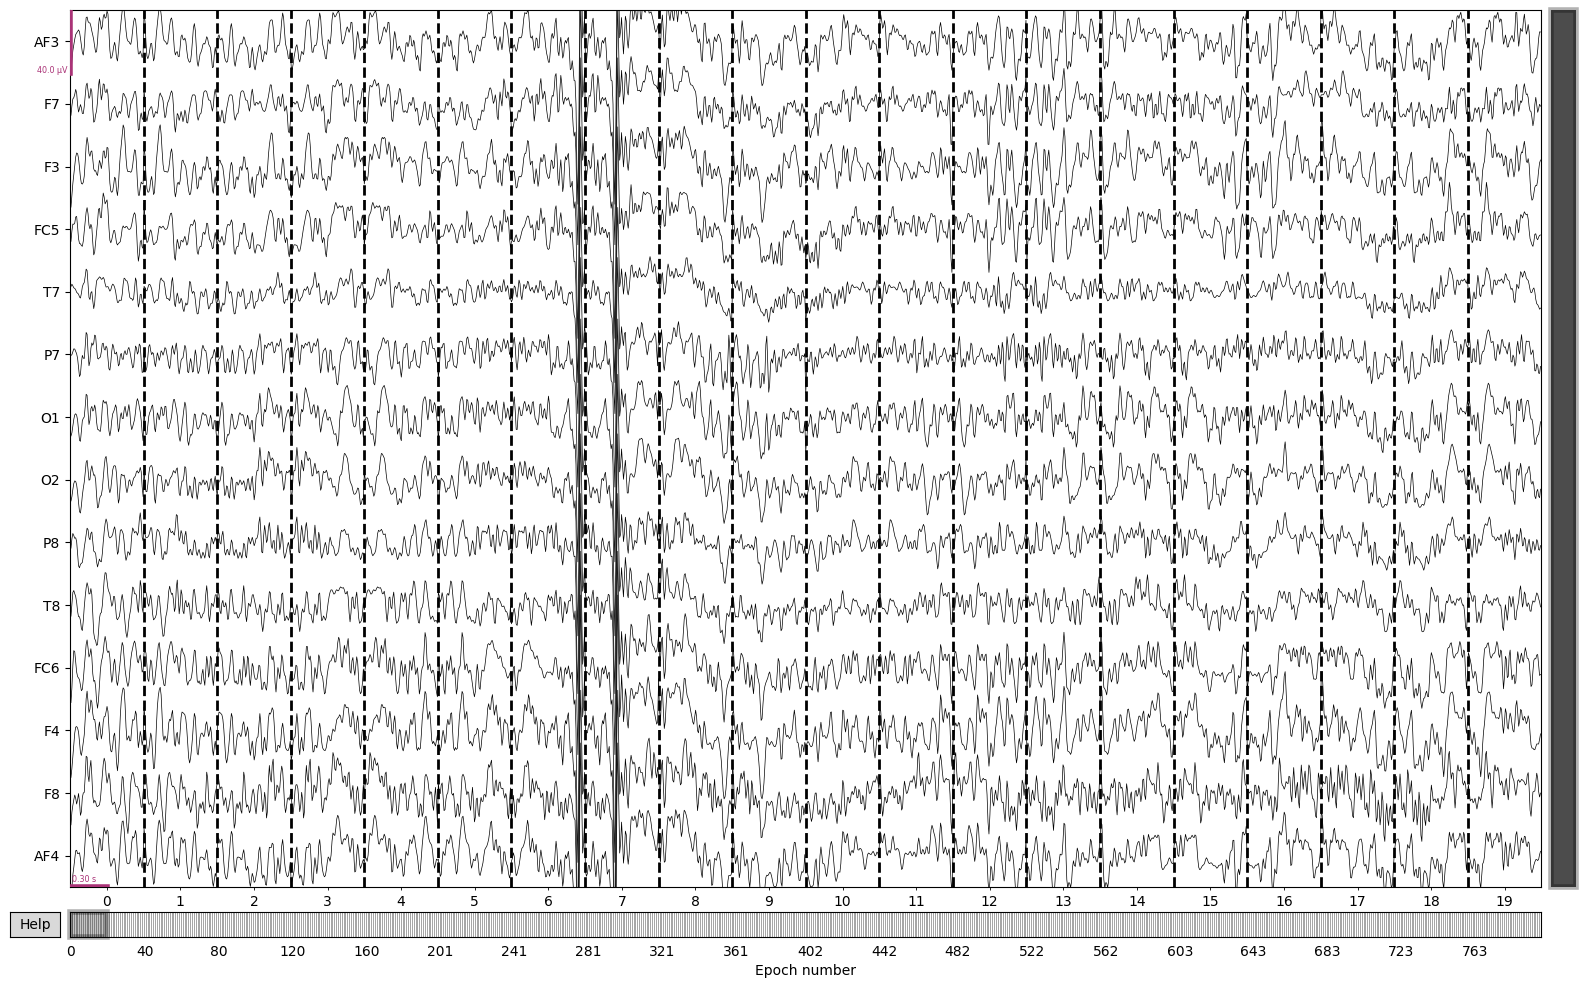

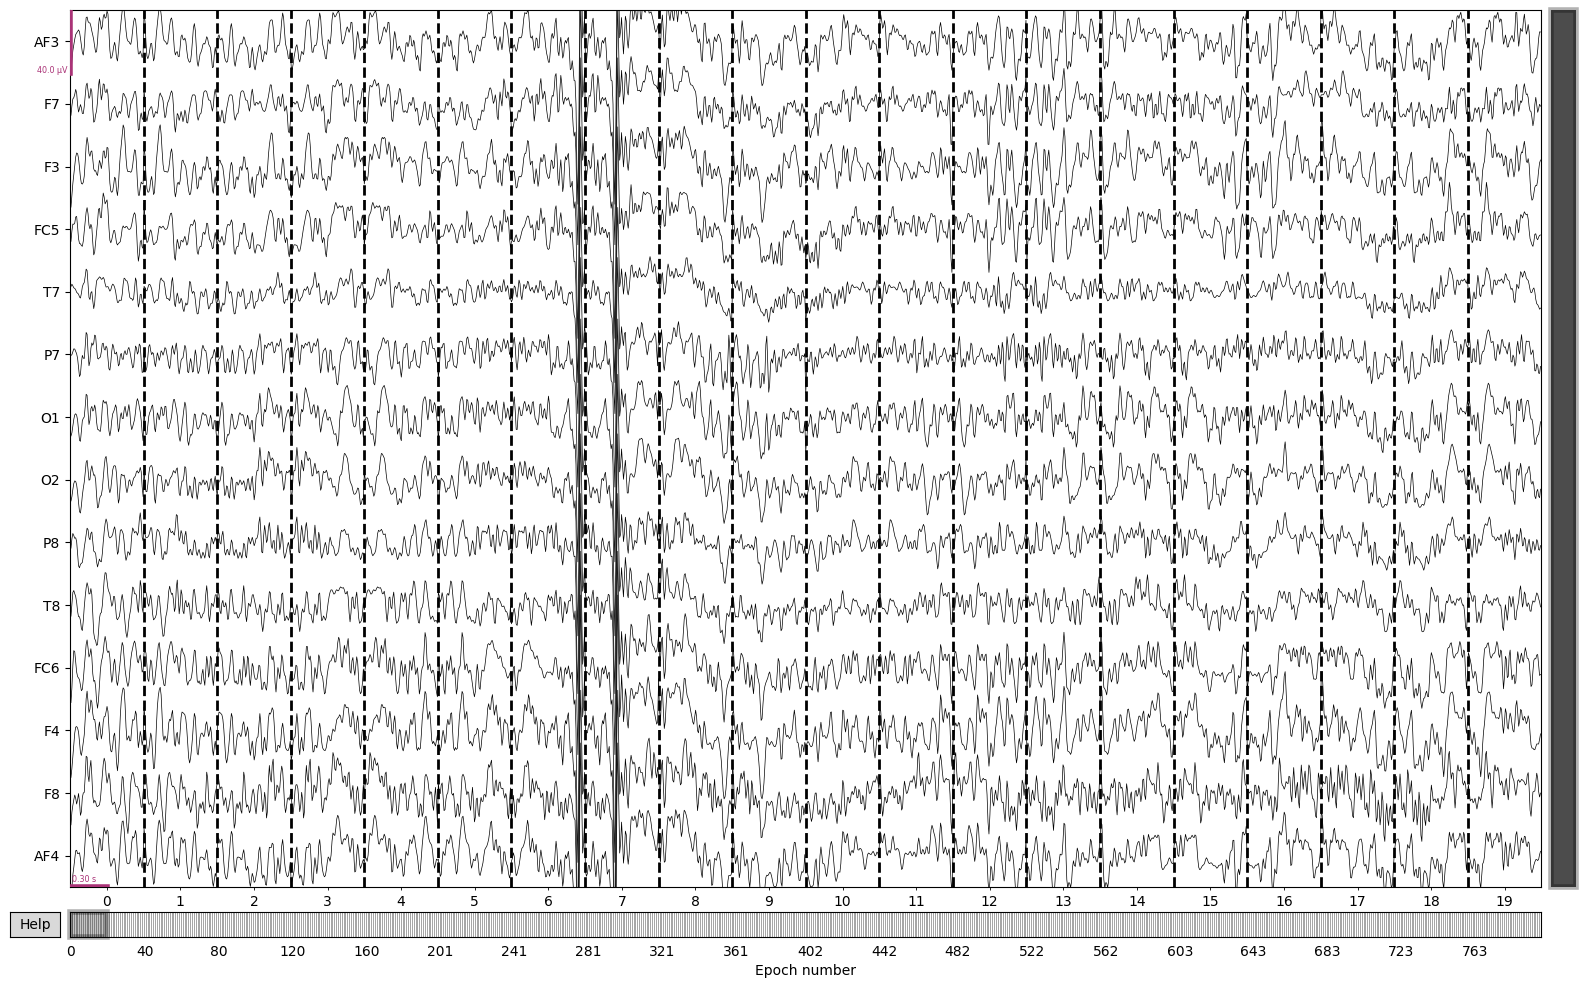

In [51]:
epochs.plot()

Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


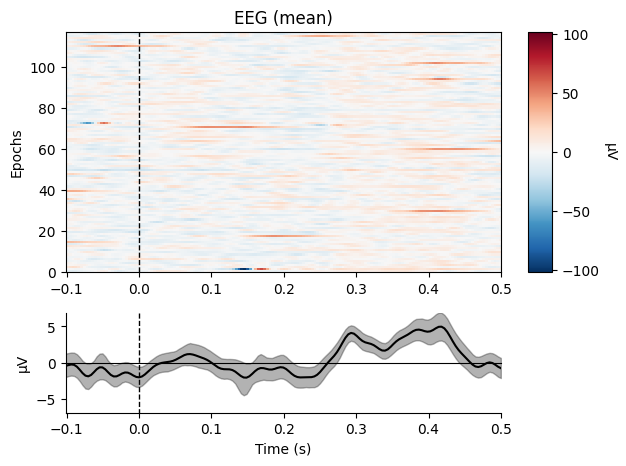

Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


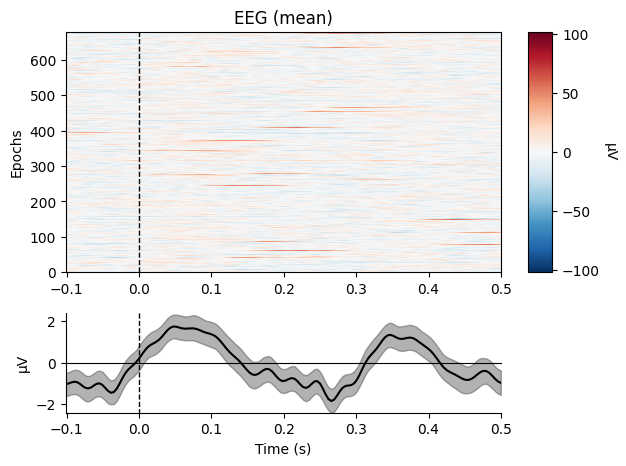

[<Figure size 640x480 with 3 Axes>]

In [52]:
mne.viz.plot_epochs_image(epochs["Target"], show=True, combine='mean')
mne.viz.plot_epochs_image(epochs["NonTarget"], show=True, combine='mean')

Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated


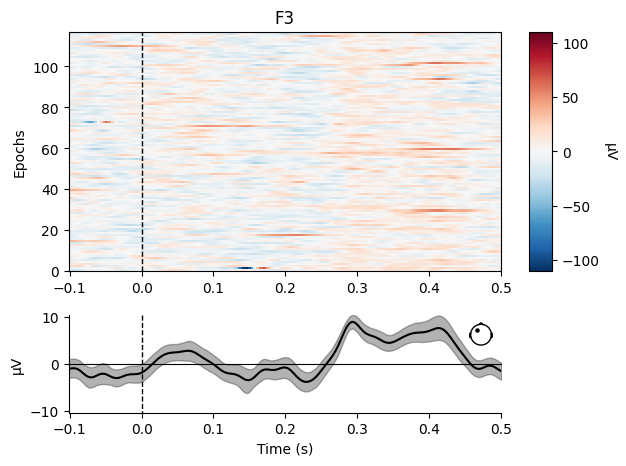

Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated


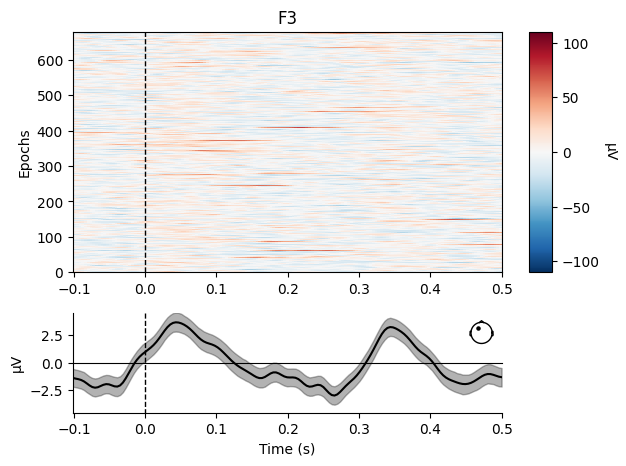

[<Figure size 640x480 with 4 Axes>]

In [53]:
epochs['Target'].plot_image(picks=["F3"])
epochs['NonTarget'].plot_image(picks=["F3"])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


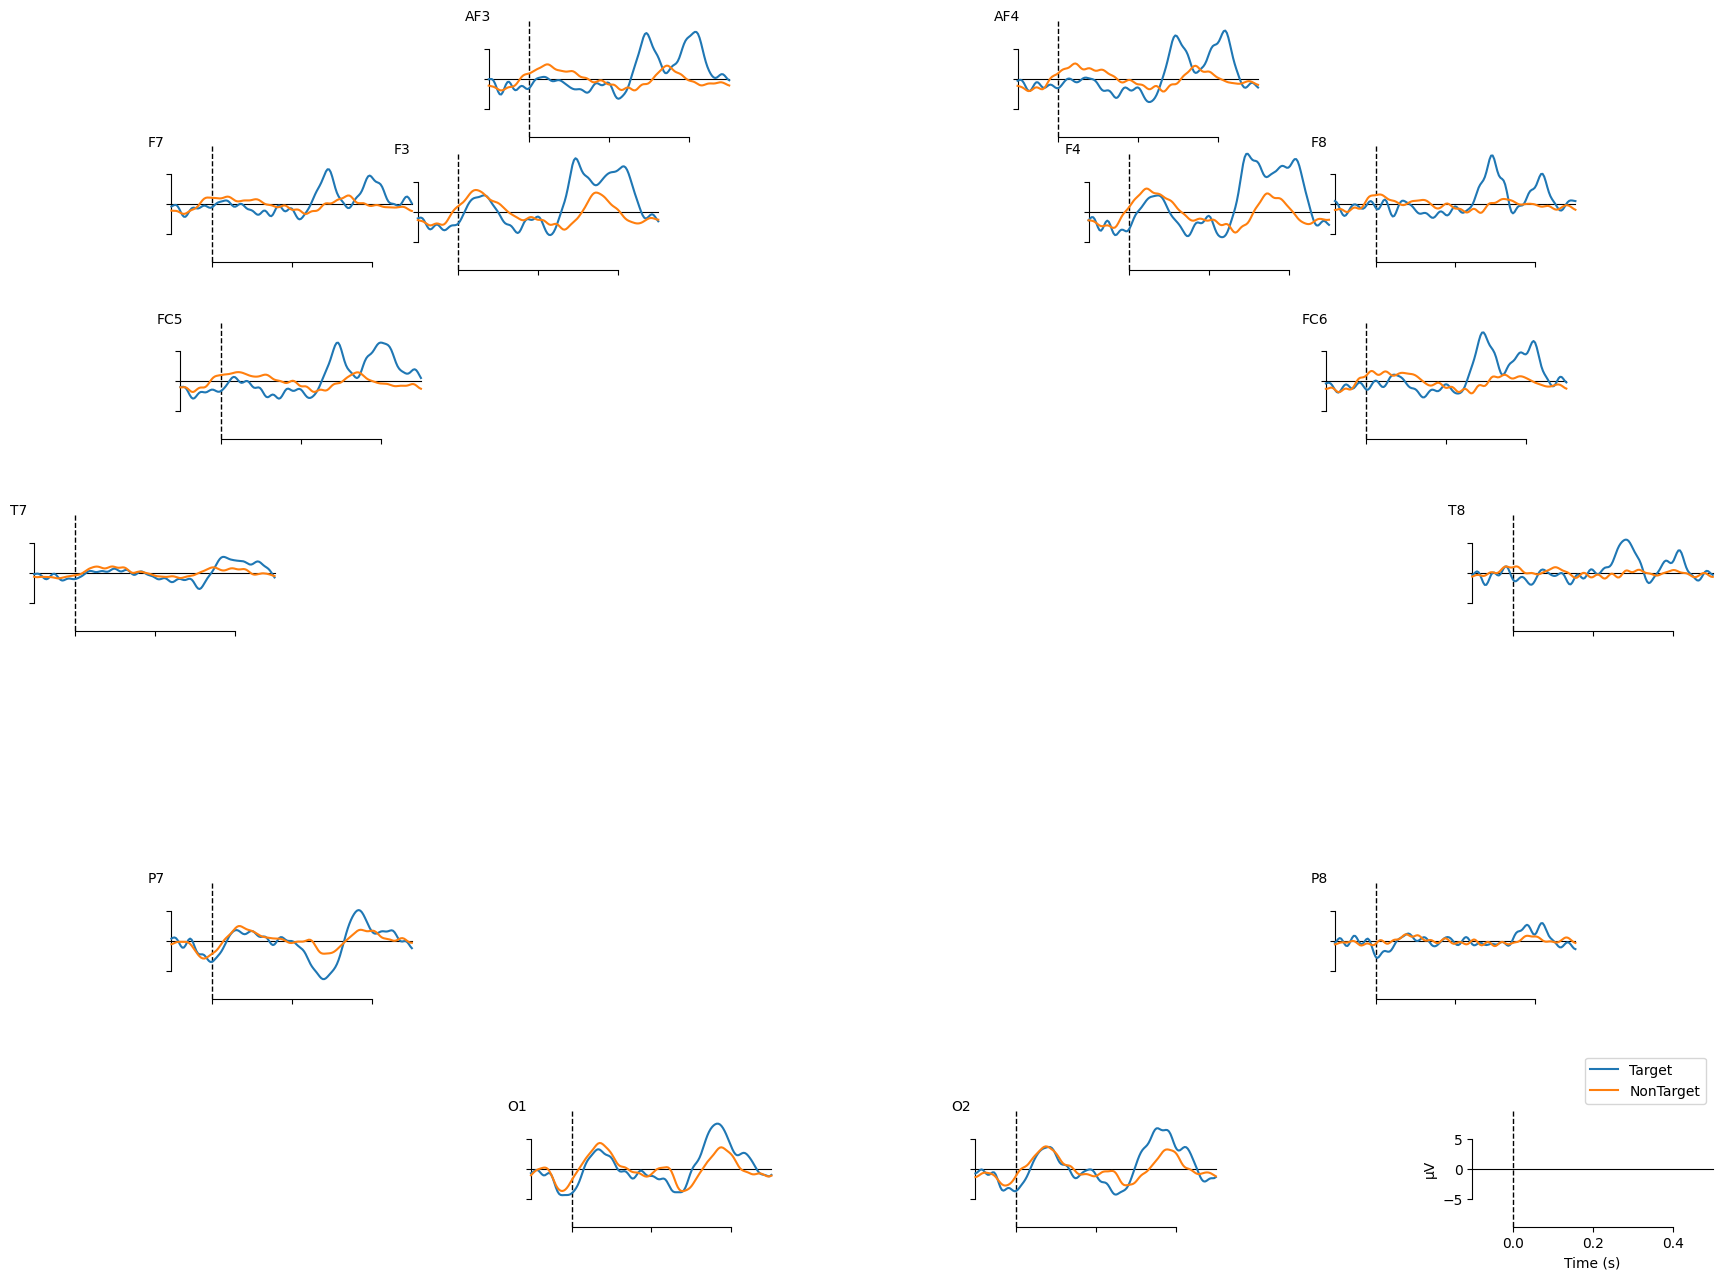

[<Figure size 1800x1400 with 15 Axes>]

In [54]:
e1 = epochs['Target'].average()
e2 = epochs['NonTarget'].average()

mne.viz.plot_compare_evokeds([e1, e2], axes='topo')

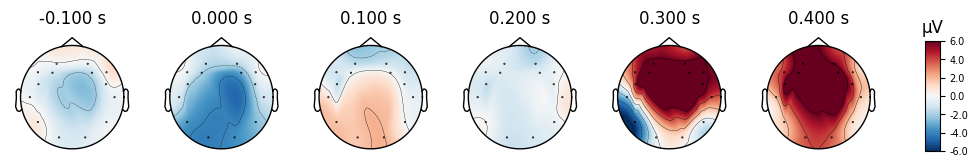

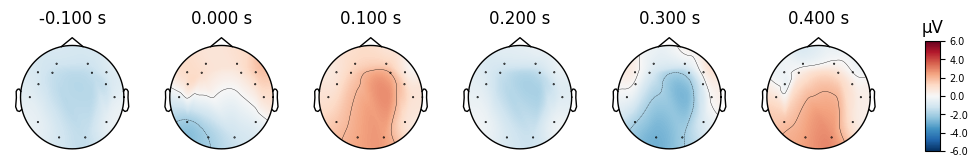

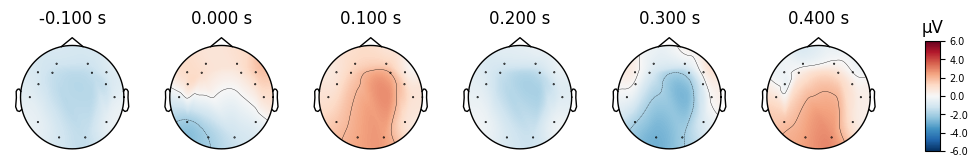

In [55]:
all_times = np.arange(EPOCHS_TMIN, EPOCHS_TMAX, 0.1)
e1.plot_topomap(all_times, vlim=(-6, 6))
e2.plot_topomap(all_times, vlim=(-6, 6))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "gfp"
combining channels using "gfp"


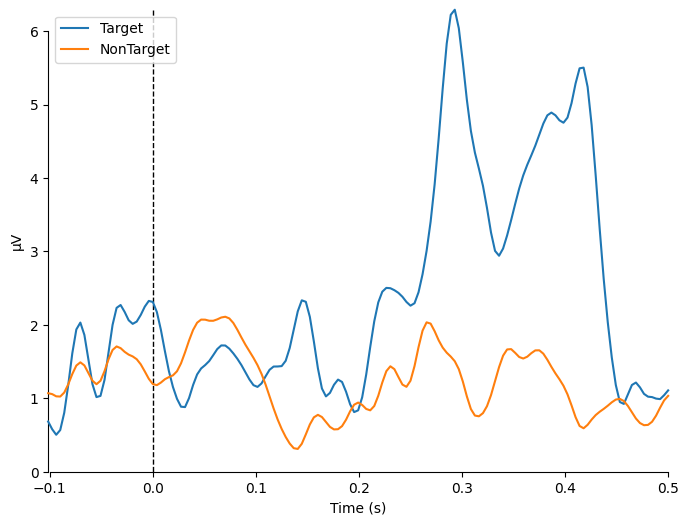

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


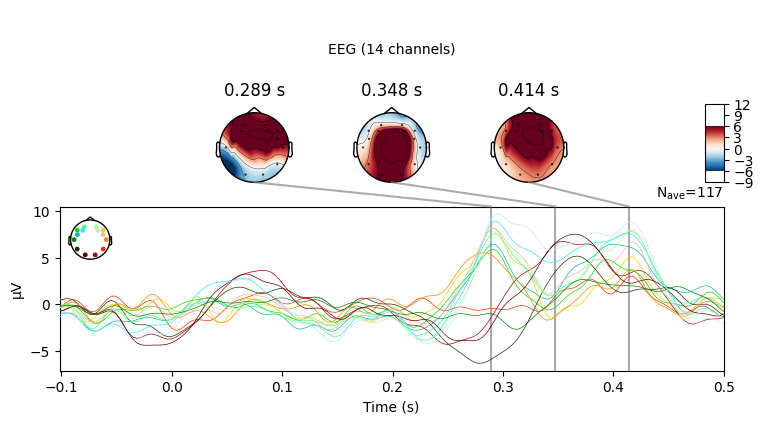

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


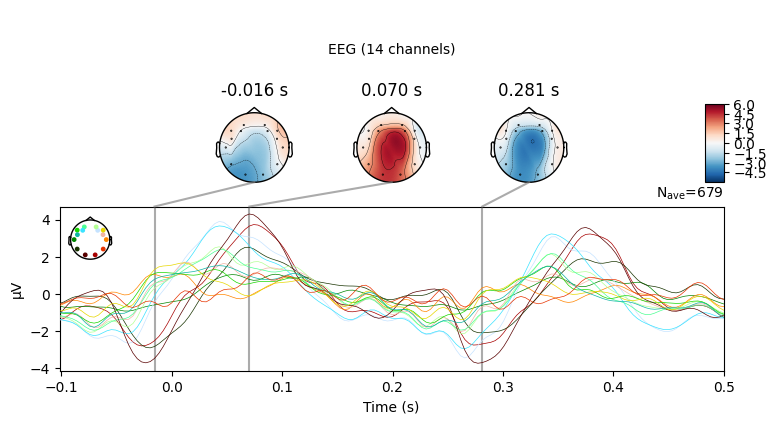

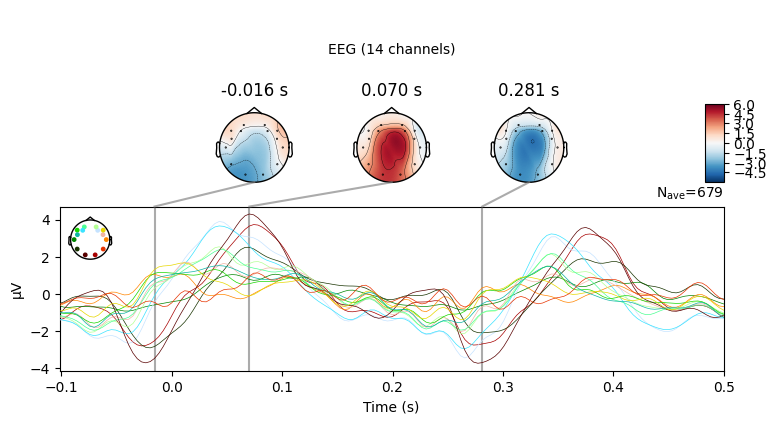

In [56]:
e1 = epochs['Target'].average()
e2 = epochs['NonTarget'].average()

mne.viz.plot_compare_evokeds([e1, e2])
e1.plot_joint(topomap_args=dict(vlim=(-6, 6)))
e2.plot_joint(topomap_args=dict(vlim=(-6, 6)))

In [57]:
from sklearn.neighbors import KNeighborsClassifier

clfs = OrderedDict()
clfs['Vect + LR'] = make_pipeline(Vectorizer(), StandardScaler(), LogisticRegression(max_iter=1000))
clfs['Vect + RegLDA'] = make_pipeline(Vectorizer(), LDA(shrinkage='auto', solver='eigen'))
clfs['Xdawn + RegLDA'] = make_pipeline(Xdawn(2, classes=[1]), Vectorizer(), LDA(shrinkage='auto', solver='eigen'))
clfs['ERPCov + TS'] = make_pipeline(ERPCovariances(), TangentSpace(), LogisticRegression())
clfs['ERPCov + MDM'] = make_pipeline(ERPCovariances(), MDM())
clfs['KNN25'] = make_pipeline(Vectorizer(),StandardScaler(), KNeighborsClassifier(n_neighbors=25))
clfs['KNN50'] = make_pipeline(Vectorizer(),StandardScaler(), KNeighborsClassifier(n_neighbors=50))
clfs['KNN100'] = make_pipeline(Vectorizer(),StandardScaler(), KNeighborsClassifier(n_neighbors=100))
clfs['KNN150'] = make_pipeline(Vectorizer(),StandardScaler(), KNeighborsClassifier(n_neighbors=150))


In [58]:
X = epochs.get_data()
y = epochs.events[:, -1]

# define cross validation
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.4, random_state=42)

# run cross validation for each pipeline
auc = []
methods = []
for m in clfs:
    res = cross_val_score(clfs[m], X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    auc.extend(res)
    methods.extend([m] * len(res))

results = pd.DataFrame(data=auc, columns=['AUC'])
results['Method'] = methods

/Users/valery/.local/share/virtualenvs/.ssh-3VzoVsjv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/valery/.local/share/virtualenvs/.ssh-3VzoVsjv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/valery/.local/share/virtualenvs/.ssh-3VzoVsjv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


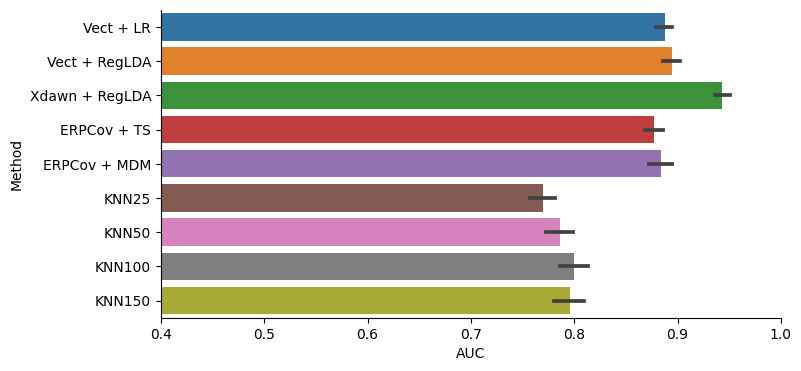

In [59]:
plt.figure(figsize=[8, 4])
sns.barplot(data=results, x='AUC', y='Method')
plt.xlim(0.4, 1)
sns.despine()
plt.show()